In [48]:
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

In [49]:
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))

In [50]:
# Set the output files direcrory and file names

apis = ['flask', 'node', 'node_new_machine']
files_dir = {}
files_dir['flask'] = './outputs/Tue 09 Jan 2018 06:46:04 PM PKT/'
files_dir['node'] = './outputs/Tue 23 Jan 2018 04:23:57 PM PKT/'
files_dir['node_new_machine'] = './outputs/Wed 24 Jan 2018 09:17:48 AM EST/'


In [51]:
# Regex
import re

mean_latency_pattern = '(INFO Mean latency: \s*)(\d*\.*\d*\s*)(ms)'
concurrency_level_pattern = r'(INFO Concurrency level:\s*)(\d*)'
total_time_pattern = r'(INFO Total time:\s*)(\d*.\d*)(\s*s)'
longest_time_pattern = r'(\d*)(\sms\s)(\(longest request\))'
cpu_idle_pattern = r'(\d*:\d*:\d*\s*[AaPp][Mm])(\s*all\s*)(\s+\d+\.\d+)(\s+\d+\.\d+)(\s+\d+\.\d+)(\s+\d+\.\d+)(\s+\d+\.\d+)(\s+\d+\.\d+)(\s+\d+\.\d+)(\s+\d+\.\d+)(\s+\d+\.\d+\s+)(\d+\.\d+)' # pick group 12
free_memory_pattern = r'(Mem:\s*)(\d*)(\s*)(\d*)(\s*)(\d*)(\s*)(\d*)(\s*)(\d*)(\s*)(\d*)(\s*)'
free_hdd_pattern = r'(/dev/sda1\s*)(\d*.?\d*[A-Z])(\s*)(\d*.?\d*[A-Z])(\s*)(\d*.?\d*)([A-Z])(\s*)(\d*.?\d*%)(\s*)(/.*)'

In [52]:
# Dictionary that holds all the data
results = {}

# Data Extractor

## Returns
A DataFrame object.

In [53]:
def extract_data(data_title, file_name):
    # Data
    mean_latencies = []
    concurrency_levels = []
    total_times = []
    longest_times = []
    cpu_percentage = []
    free_memory = [] # 
    free_hdd = [] # in GB

    with open(file_name) as file:
        lines = file.readlines()
        for line in lines:    

            # Mean Latency
            mean_latency_match = re.search(mean_latency_pattern, line)
            if(mean_latency_match):
                mean_latencies.append(float(mean_latency_match.group(2)))


            # Concurrency Level
            concurrency_match = re.search(concurrency_level_pattern, line)
            if(concurrency_match):
                concurrency_levels.append(int(concurrency_match.group(2)))


             # Total Time
            total_time_match = re.search(total_time_pattern, line)
            if(total_time_match):
                total_times.append(float(total_time_match.group(2)))


            # Longest Time
            longest_time_match = re.search(longest_time_pattern, line)
            if(longest_time_match):
                longest_times.append(int(longest_time_match.group(1)))
                
            # CPU percentage usage
            cpu_idle_match = re.search(cpu_idle_pattern, line)
            if(cpu_idle_match):
                cpu_percentage.append(100 - float(cpu_idle_match.group(12)))
            
            # Free memory
            free_mem_match = re.search(free_memory_pattern, line)
            if(free_mem_match):
                free_memory.append(float(free_mem_match.group(6)))
                
            # Free hdd
            free_hdd_match = re.search(free_hdd_pattern, line)
            if(free_hdd_match):
                free_hdd.append(int(free_hdd_match.group(6)))



    # Sanity check
    print(file_name + ' Equal lengths: ' + str(len(mean_latencies)==len(concurrency_levels)==len(total_times)==len(longest_times)==len(cpu_percentage)==len(free_memory)==len(free_hdd)))
#     print('mean_latencies' + str(len(mean_latencies)))
#     print('concurrency_levels' + str(len(concurrency_levels)))
#     print('total_times' + str(len(total_times)))
#     print('longest_times' + str(len(longest_times)))
#     print('cpu_percentage' + str(len(cpu_percentage)))
#     print('free_memory' + str(len(free_memory)))
#     print('free_hdd' + str(len(free_hdd)))
    
    if(len(cpu_percentage) == 0):
        cpu_percentage = [0]*len(mean_latencies)
    
    if(len(free_memory) == 0):
        free_memory = [0]*len(mean_latencies)
    
    if(len(free_hdd) == 0):
        free_hdd = [0]*len(mean_latencies)
    
    d = {
        'data_title': ([data_title]*len(mean_latencies)), 
        'concurrency_levels': concurrency_levels, 
        'mean_latencies': mean_latencies, 
        'longest_times': longest_times, 
        'total_times': total_times, 
        'cpu_percentage': cpu_percentage, 
        'free_memory': free_memory, 
        'free_hdd': free_hdd
    }
    df = pd.DataFrame(data=d)
    
    return df

# Ping

In [90]:
# Ping file
dataframes = {}
for api in apis:
    file_name = files_dir[api] + 'ping.txt'
    dataframes[api] = extract_data(api, file_name)

df = dataframes[apis[0]].append([dataframes[apis[1]], dataframes[apis[2]]], ignore_index=True)
results['ping'] = df

View(df)

./outputs/Tue 09 Jan 2018 06:46:04 PM PKT/ping.txt Equal lengths: False
./outputs/Tue 23 Jan 2018 04:23:57 PM PKT/ping.txt Equal lengths: False
./outputs/Wed 24 Jan 2018 09:17:48 AM EST/ping.txt Equal lengths: True


# Submission

## Hello World

In [60]:
# file_name = './outputs/Tue 09 Jan 2018 06:46:04 PM PKT/submission_hello_world.json.txt'
# results['submission_hello_world'] = extract_data(file_name)

dataframes = {}
for api in apis:
    file_name = files_dir[api] + 'submission_hello_world.json.txt'
    dataframes[api] = extract_data(api, file_name)

df = dataframes[apis[0]].append([dataframes[apis[1]], dataframes[apis[2]]], ignore_index=True)
results['submission_hello'] = df

./outputs/Tue 09 Jan 2018 06:46:04 PM PKT/submission_hello_world.json.txt Equal lengths: False
./outputs/Tue 23 Jan 2018 04:23:57 PM PKT/submission_hello_world.json.txt Equal lengths: False
./outputs/Wed 24 Jan 2018 09:17:48 AM EST/submission_hello_world.json.txt Equal lengths: True


## List

In [61]:
# file_name = './outputs/Tue 09 Jan 2018 06:46:04 PM PKT/submission_list.json.txt'
# results['submission_list'] = extract_data(file_name)

# for api in apis:
#     file_name = files_dir[api] + 'submission_list.json.txt'
#     submission_df = extract_data(api, file_name)
#     results[api]['submission_list'] = submission_df
# print(results)

dataframes = {}
for api in apis:
    file_name = files_dir[api] + 'submission_list.json.txt'
    dataframes[api] = extract_data(api, file_name)

df = dataframes[apis[0]].append([dataframes[apis[1]], dataframes[apis[2]]], ignore_index=True)
results['submission_list'] = df

./outputs/Tue 09 Jan 2018 06:46:04 PM PKT/submission_list.json.txt Equal lengths: False
./outputs/Tue 23 Jan 2018 04:23:57 PM PKT/submission_list.json.txt Equal lengths: False
./outputs/Wed 24 Jan 2018 09:17:48 AM EST/submission_list.json.txt Equal lengths: True


# Visualization

## Ping

(0, 50)

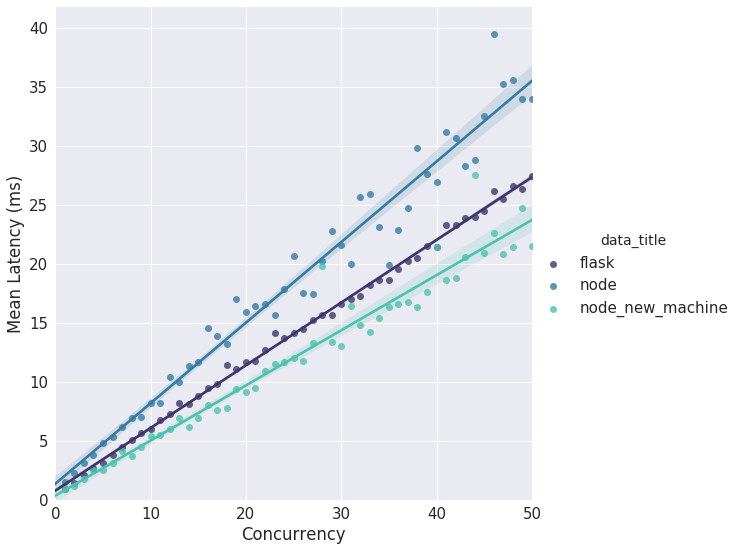

In [62]:
# MEAN LATENCY
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="mean_latencies", hue="data_title", data=results['ping'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Mean Latency (ms)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,50)

(0, 50)

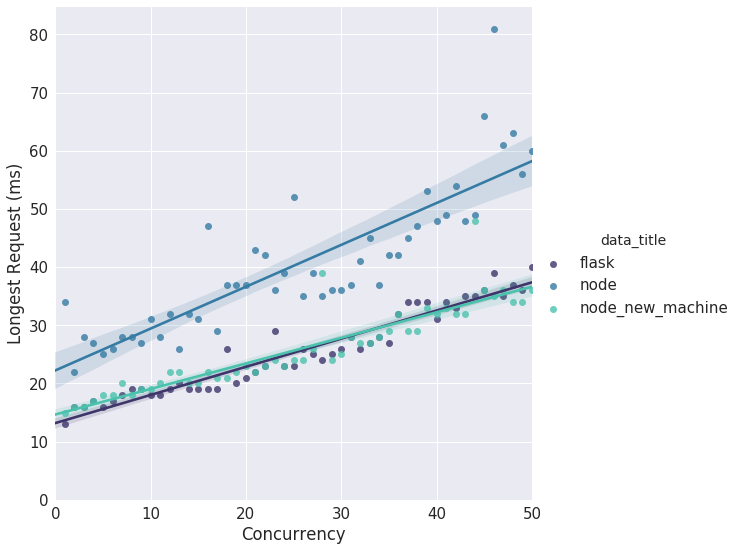

In [63]:
# LONGEST TIME
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="longest_times", hue="data_title", data=results['ping'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Longest Request (ms)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,50)

(0, 50)

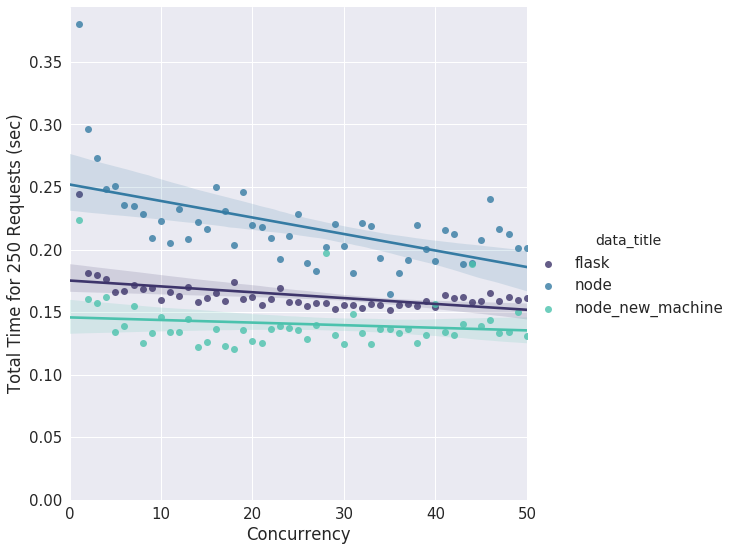

In [64]:
# Total Time
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="total_times", hue="data_title", data=results['ping'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Total Time for 250 Requests (sec)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,50)

(0, 50)

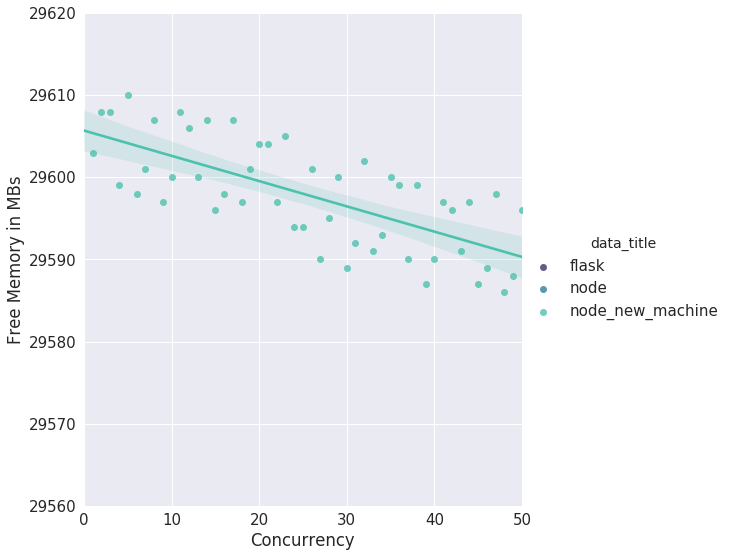

In [85]:
# Memory usage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="free_memory", hue="data_title", data=results['ping'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Free Memory in MBs")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(29560,29620)
g.axes[0,0].set_xlim(0,50)

(0, 50)

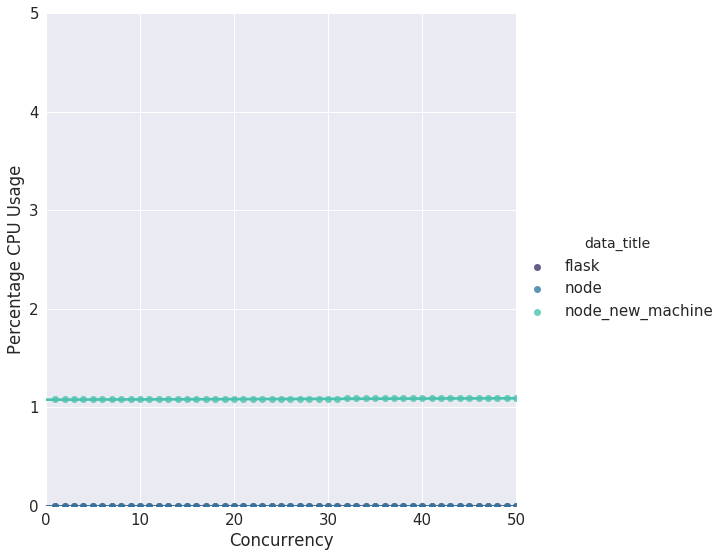

In [89]:
# CPU Percentage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="cpu_percentage", hue="data_title", data=results['ping'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Percentage CPU Usage")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,5)
g.axes[0,0].set_xlim(0,50)

(0, 50)

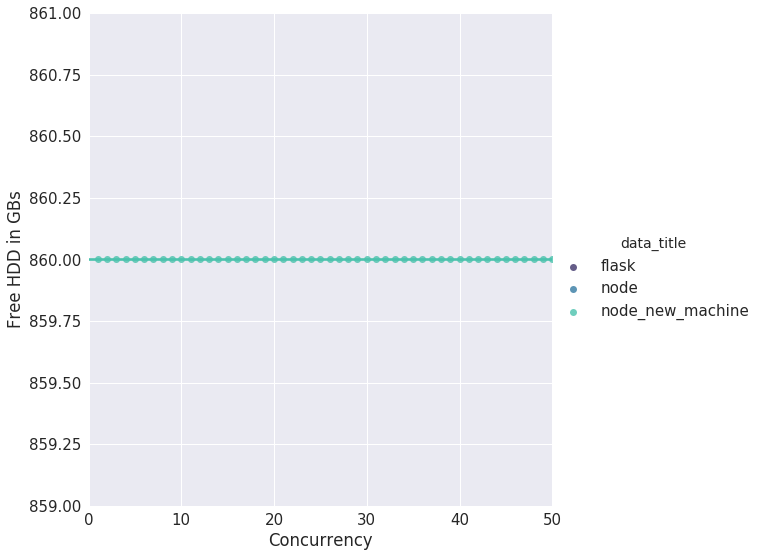

In [93]:
# HDD Usage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="free_hdd", hue="data_title", data=results['ping'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Free HDD in GBs")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(859,861)
g.axes[0,0].set_xlim(0,50)

## Submission

### Hello World

(0, 50)

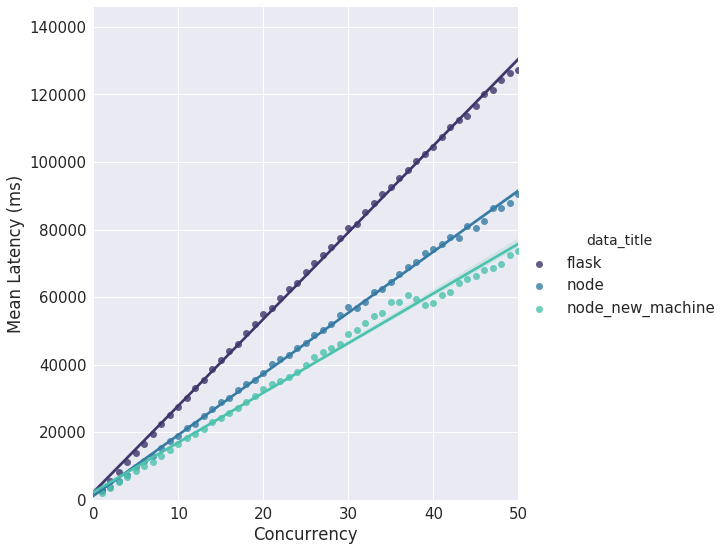

In [65]:
# MEAN LATENCY
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="mean_latencies", hue="data_title", data=results['submission_hello'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Mean Latency (ms)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,50)

(0, 50)

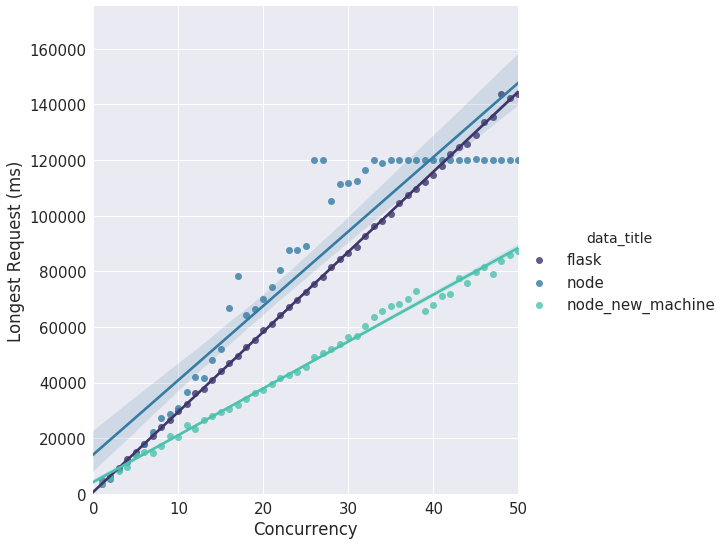

In [66]:
# LONGEST TIME
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="longest_times", hue="data_title", data=results['submission_hello'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Longest Request (ms)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,50)

(0, 50)

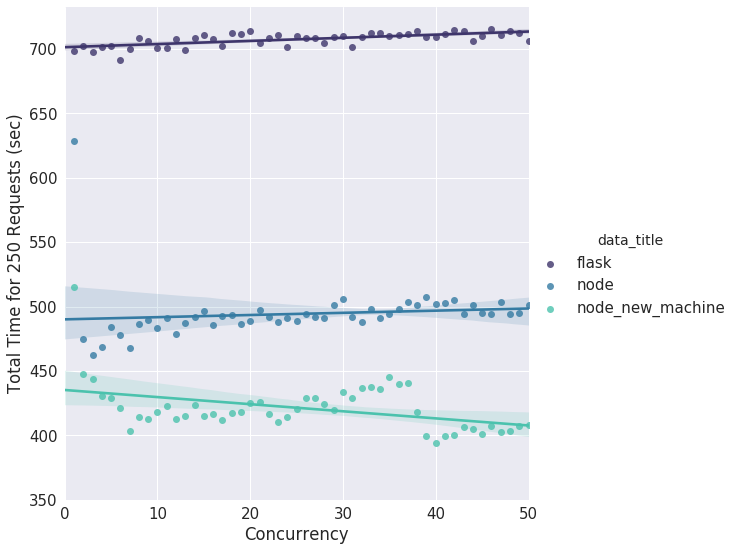

In [94]:
# Total Time
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="total_times", hue="data_title", data=results['submission_hello'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Total Time for 250 Requests (sec)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(350,)
g.axes[0,0].set_xlim(0,50)

(0, 50)

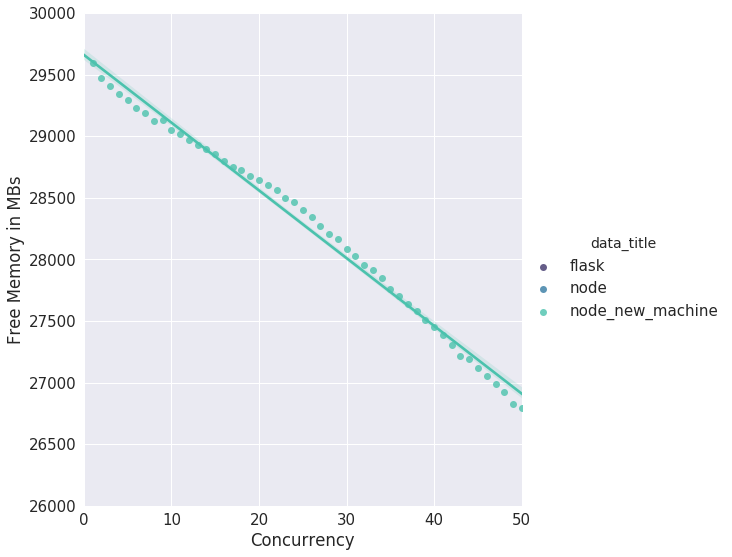

In [106]:
# Memory usage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="free_memory", hue="data_title", data=results['submission_hello'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Free Memory in MBs")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(26000,30000)
g.axes[0,0].set_xlim(0,50)

(0, 50)

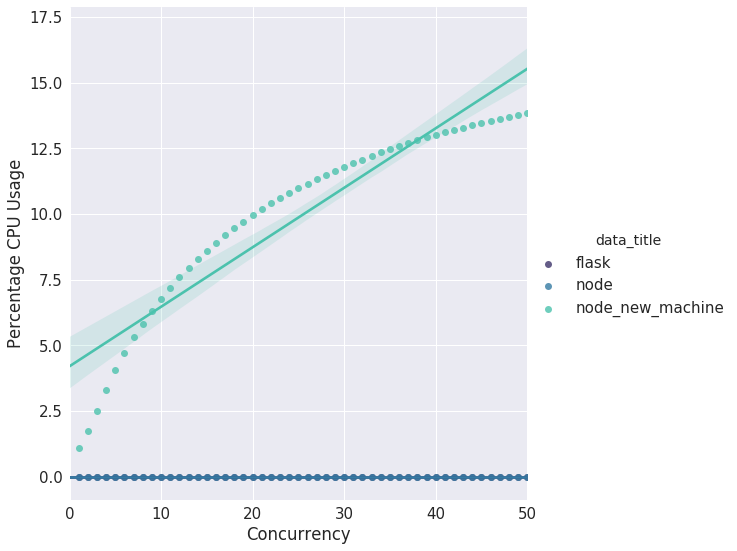

In [101]:
# CPU Percentage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="cpu_percentage", hue="data_title", data=results['submission_hello'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Percentage CPU Usage")
g.set_xlabels("Concurrency")
# g.axes[0,0].set_ylim(0,2)
g.axes[0,0].set_xlim(0,50)

(0, 50)

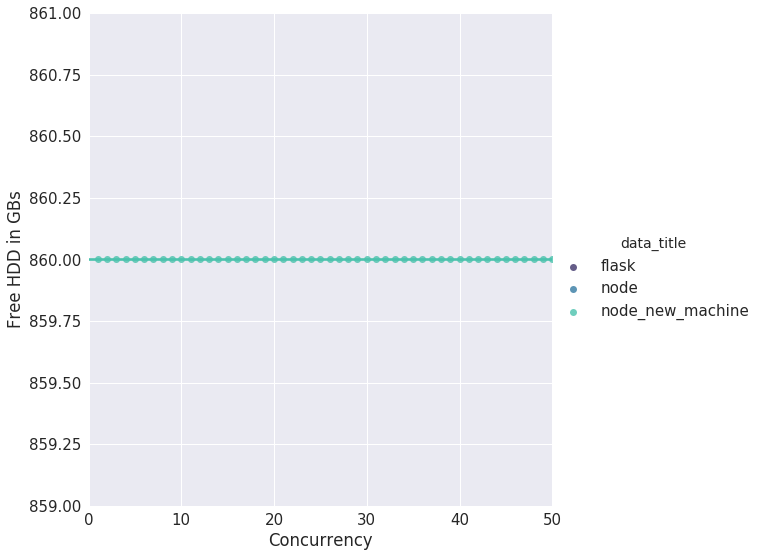

In [103]:
# HDD Usage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="free_hdd", hue="data_title", data=results['submission_hello'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Free HDD in GBs")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(859,861)
g.axes[0,0].set_xlim(0,50)

### List

(0, 50)

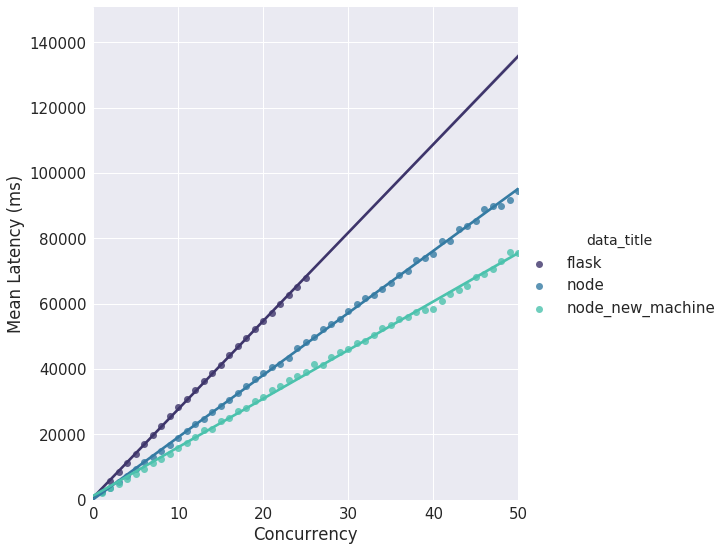

In [68]:
# MEAN LATENCY
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="mean_latencies", hue="data_title", data=results['submission_list'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Mean Latency (ms)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,50)

(0, 50)

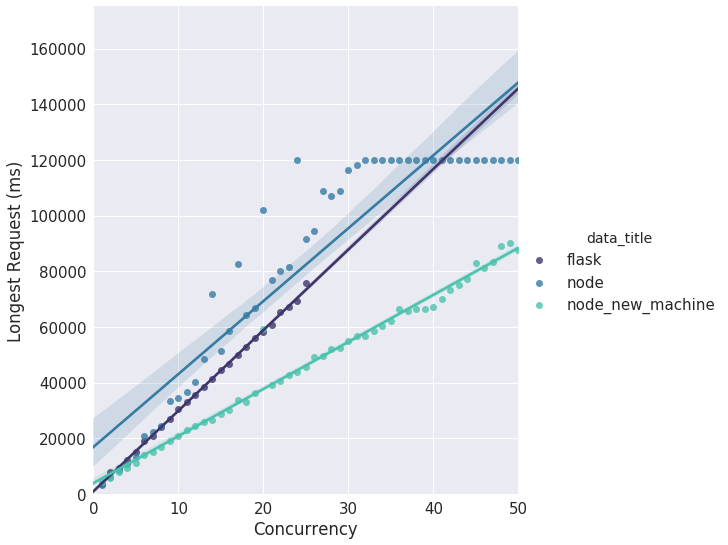

In [69]:
# LONGEST TIME
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="longest_times", hue="data_title", data=results['submission_list'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Longest Request (ms)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,50)

(0, 25)

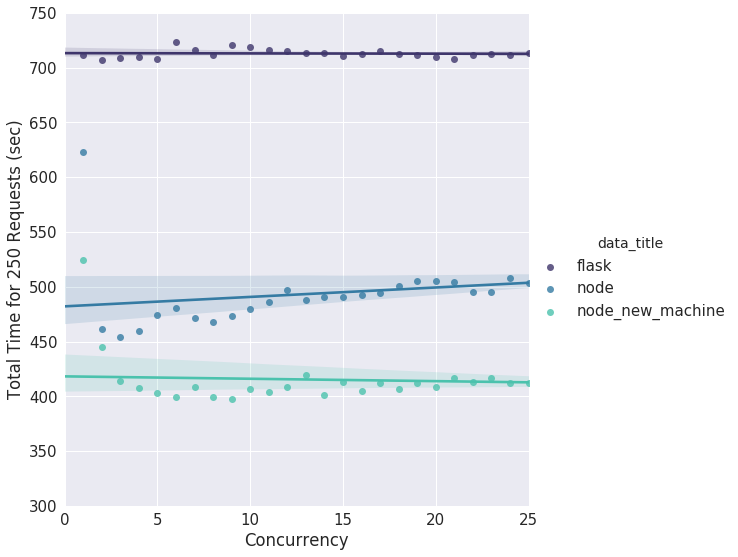

In [72]:
# Total Time
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="total_times", hue="data_title", data=results['submission_list'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Total Time for 250 Requests (sec)")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(300,750)
g.axes[0,0].set_xlim(0,25)

(0, 50)

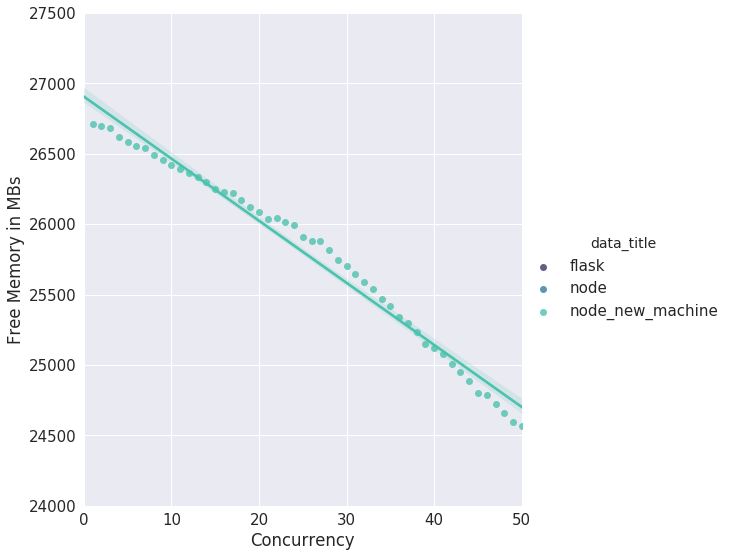

In [107]:
# Memory usage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="free_memory", hue="data_title", data=results['submission_list'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Free Memory in MBs")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(24000,27500)
g.axes[0,0].set_xlim(0,50)

(0, 50)

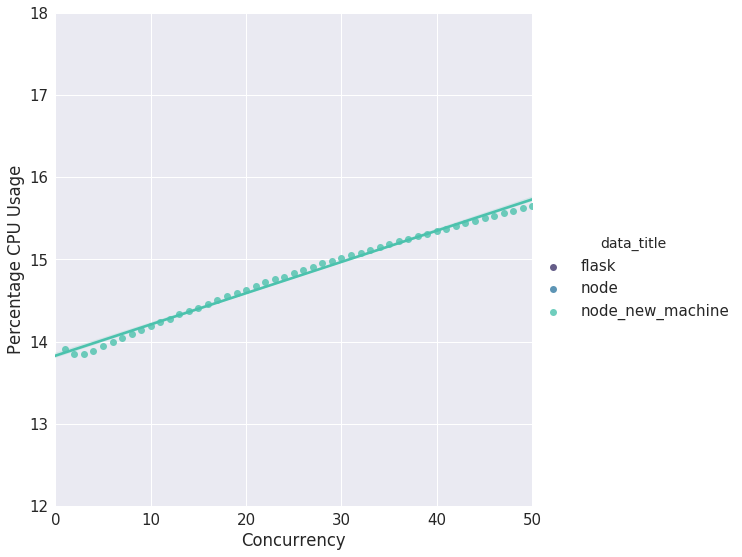

In [110]:
# CPU Percentage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="cpu_percentage", hue="data_title", data=results['submission_list'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Percentage CPU Usage")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(12,18)
g.axes[0,0].set_xlim(0,50)

(0, 50)

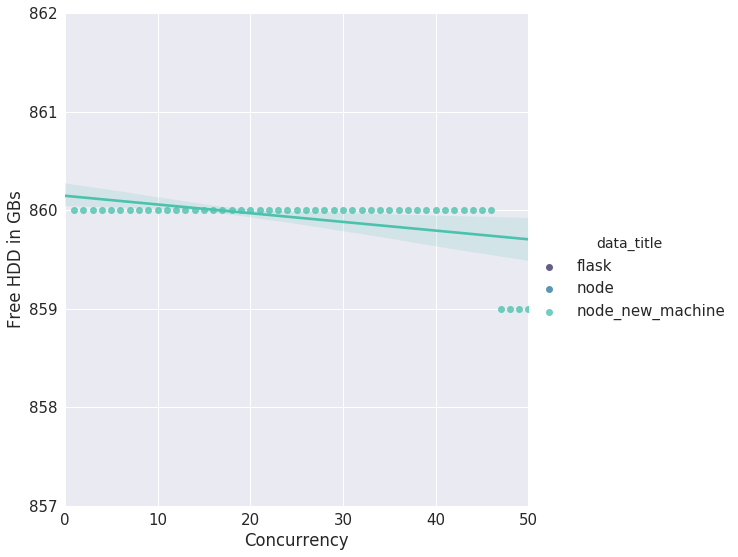

In [113]:
# HDD Usage

sns.set(style="whitegrid")
sns.set(font_scale=1.5)
g = sns.lmplot(x="concurrency_levels", y="free_hdd", hue="data_title", data=results['submission_list'],
                    size=8, palette="mako")
g.despine(left=True)
g.set_ylabels("Free HDD in GBs")
g.set_xlabels("Concurrency")
g.axes[0,0].set_ylim(857,862)
g.axes[0,0].set_xlim(0,50)